In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv(r"C:\Users\91936\Desktop\EDA\Prakhar.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#Sorting on basis of ages for better understanding
df.sort_values('age', inplace = True)
df.drop_duplicates(inplace = True)
df.reset_index(drop = True, inplace = True)
df

,age,sex,bmi,children,smoker,region,charges
0,18,female,39.820,0,no,southeast,1633.96180
1,18,female,31.350,0,no,southeast,1622.18850
2,18,female,25.080,0,no,northeast,2196.47320
3,18,female,33.880,0,no,southeast,11482.63485
4,18,male,25.460,0,no,northeast,1708.00140
...,...,...,...,...,...,...,...
1332,64,male,25.600,2,no,southwest,14988.43200
1333,64,male,34.500,0,no,southwest,13822.80300
1334,64,female,30.115,3,no,northwest,16455.70785
1335,64,male,23.760,0,yes,southeast,26926.51440


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
for j in df.columns:
    print(j)
    print(df[j].unique())
    print()

age
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64]

sex
['female' 'male']

bmi
[39.82  31.35  25.08  33.88  25.46  32.12  37.29  33.155 33.535 30.03
 31.68  28.5   33.66  21.66  35.2   35.625 40.28  38.17  26.125 30.115
 24.09  43.01  25.175 36.85  15.96  38.28  23.75  34.43  26.73  17.29
 38.665 53.13  22.99  28.31  20.79  30.4   29.165 29.37  41.14  39.16
 23.085 28.215 31.92  23.32  34.1   27.36  21.78  30.305 21.565 42.24
 40.185 23.21  26.315 26.18  31.73  27.28  21.47  40.26  33.77  39.14
 30.14  31.13  33.33  44.88  21.7   34.7   27.835 32.49  24.7   18.6
 27.6   19.8   20.6   20.615 36.955 20.9   29.07  27.93  17.8   34.8
 32.11  30.59  30.02  31.825 28.4   27.7   34.4   27.265 17.48  20.7
 33.11  24.51  22.61  23.4   20.3   35.4   25.555 21.755 28.88  36.575
 22.515 37.43  30.495 35.53  35.15  25.745 33.1   26.03  29.8   39.615
 28.7   24.605 30.25  40.5   34.9   32.9   27.9   28.9

In [7]:
#Converting into numerical values for ease of graph plotting and for easier understanding of dataset by Machine too
for j in df.columns:
    for i in df.index:
        if(df.loc[i,j] == 'yes' or df.loc[i,j] == 'male'):
            df.loc[i,j] = 1
        elif(df.loc[i,j] == 'no' or df.loc[i,j] == 'female'):
            df.loc[i,j] = 0
        elif(df.loc[i,j] == 'southwest'):
            df.loc[i,j] = 0
        elif(df.loc[i,j] == 'southeast'):
            df.loc[i,j] = 1
        elif(df.loc[i,j] == 'northwest'):
            df.loc[i,j] = 2
        elif(df.loc[i,j] == 'northeast'):
            df.loc[i,j] = 3

In [8]:
#Converting data typye from object to numerical
df['smoker'] = pd.to_numeric(df['smoker'])
df['sex'] = pd.to_numeric(df['sex'])
df['region'] = pd.to_numeric(df['region'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   region    1337 non-null   int64  
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.2 KB


In [10]:
#finding Interquartile range for determining outliers
Q1 = np.quantile(df['charges'],0.25)
Q3 = np.quantile(df['charges'],0.75)
IQR = Q3 - Q1

In [11]:
#Dropping outliers because their presence might disturb our analysis and due to their extremely small or extremely large values
#they effect mean and standard deviation.
for i in df.index:
    if(df.loc[i,'charges'] >= (Q3 + (IQR*1.5)) or df.loc[i,'charges'] < (Q1 - (IQR*1.5))):
        df.drop(i,axis = 0,inplace = True)
df.reset_index(drop = True, inplace = True)
df.shape

(1198, 7)

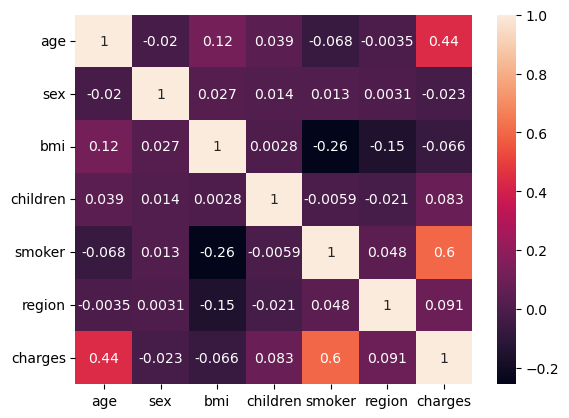

In [12]:
#Plotting corelation map for understanding our features relation
sns.heatmap(df.corr(),annot = True)
plt.show()

# Above matrix shows that charges have a great linear positive relationship with age and even stronger relationship with smoking status...Therefore, for a regression model other features can be pretty much dropped as they are hardly effecting the result in any way

# Seeing as how charges depend greatly on smoking status and age factor it is safe to assume that the given data most likely represents medical charges and not household charges

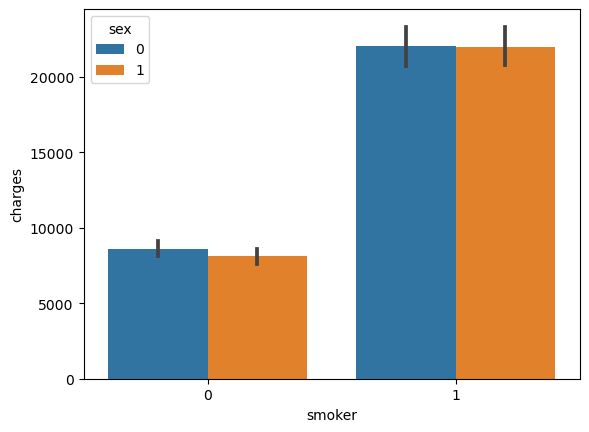

In [13]:
sns.barplot(x = 'smoker', y = 'charges', hue = 'sex', data = df)
plt.show()

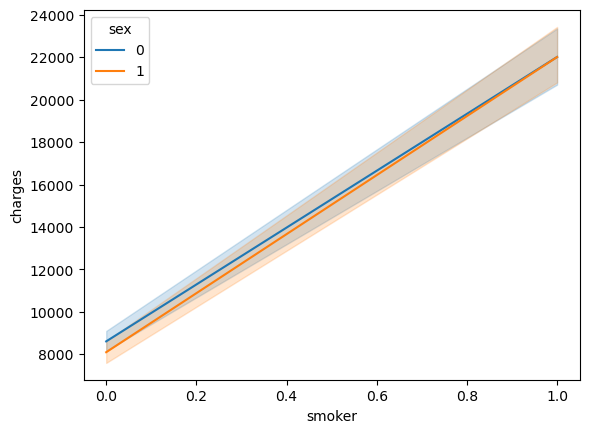

In [14]:
sns.lineplot(x = 'smoker', y = 'charges', hue = 'sex', data = df)
plt.show()

# This shows that for smokers both male and female have similar charge range while for non-smoking population females have higher charges

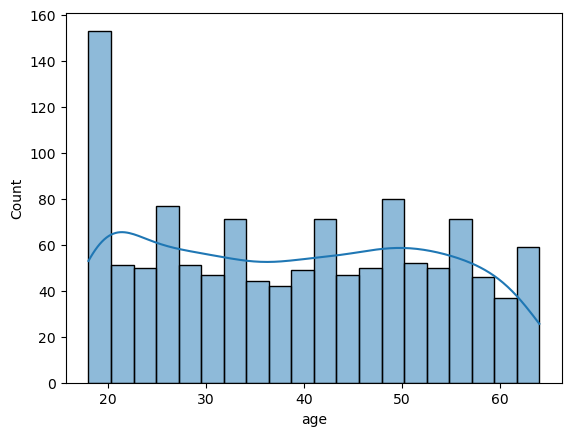

In [15]:
sns.histplot(df['age'],kde = True,bins = 20)
plt.show()

# This shows that the largest pool of age in our dataset is near 20s

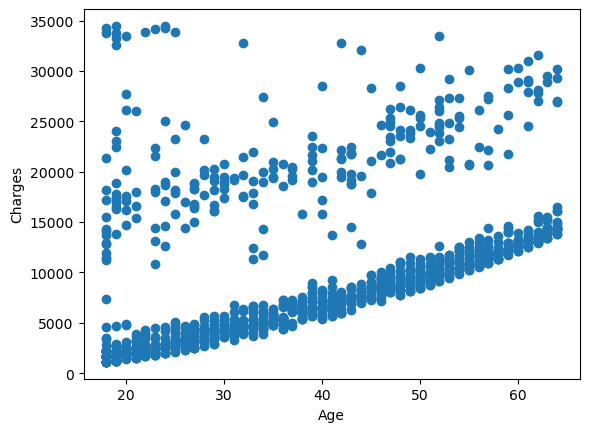

In [16]:
plt.scatter(df['age'],df['charges'])
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

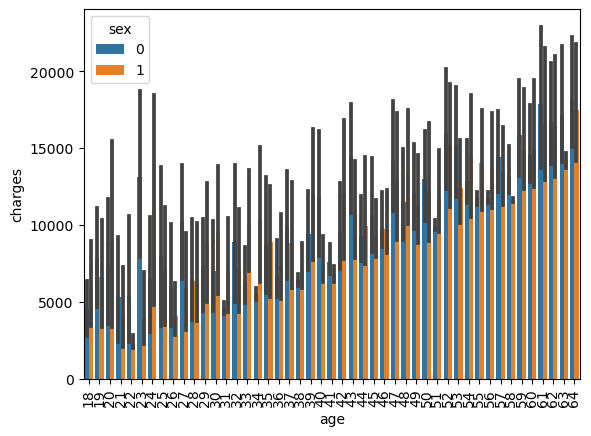

In [17]:
sns.barplot(x ='age', y = 'charges',hue = 'sex', data = df)
plt.xticks(rotation=90)
plt.show()

# these plots aren't very useful as the dataset is too big and no observations can be made from these...So, we're gonna try and find different ways to study this age-charges relation

In [18]:
#Grouping on basis of age by taking mean of different features
d1 = df.groupby('age').mean()
d1.drop(['sex','bmi','children','smoker','region'], axis = 1,inplace = True)
d1

,charges
age,
18,5278.172359
19,7251.992490
20,8104.493504
21,4730.464330
22,3914.345276
23,8172.042517
24,8648.871998
25,7586.054592
26,5024.514431


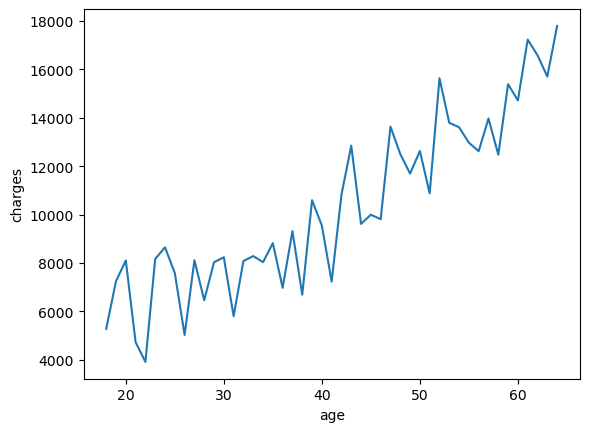

In [19]:
sns.lineplot(x = 'age', y = 'charges',data = d1)
plt.show()

# Mean values of chargez in all age groups increases as age increases except for some dips that are seen regularily in the graph

In [20]:
#Grouping on basis of median
d2 = df.groupby('age').median()
d2.drop(['sex','bmi','children','smoker','region'], axis = 1,inplace = True)
d2

,charges
age,
18,1727.540000
19,2128.431050
20,2457.211150
21,2254.423600
22,2254.796700
23,3200.050825
24,2949.825425
25,3451.981725
26,3385.399150


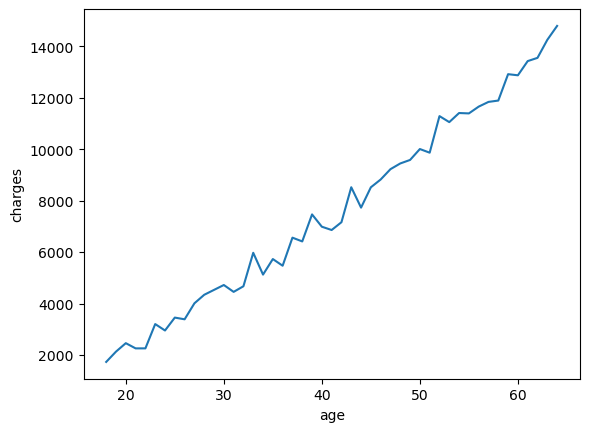

In [21]:
sns.lineplot(x = 'age', y = 'charges', data = d2)
plt.show()

# Median values of charges for all age groups increase almost in a straight line

In [22]:
#Making sub datasets for better understanding of relation between age and charges
middle = len(df)//2
fourth = len(df)//4

# 0to25%
df1 = df.iloc[:fourth]

# 25to50%
df2 = df.iloc[fourth:middle]
df2.reset_index(drop = True,inplace = True)

# 50to75%
df3 = df.iloc[middle:(middle+fourth)]
df3.reset_index(drop = True, inplace = True)

#75to100%
df4 = df.iloc[(middle+fourth):]
df4.reset_index(drop = True, inplace = True)

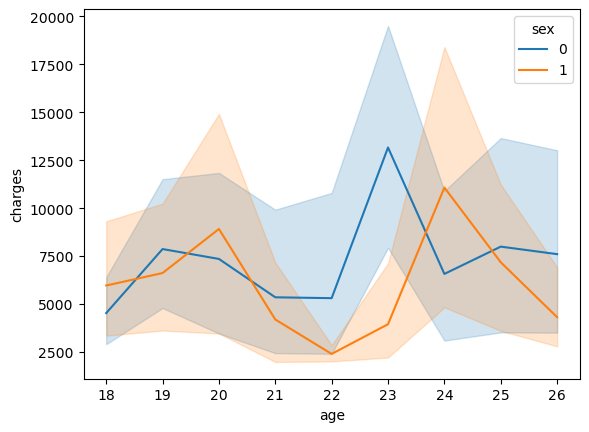

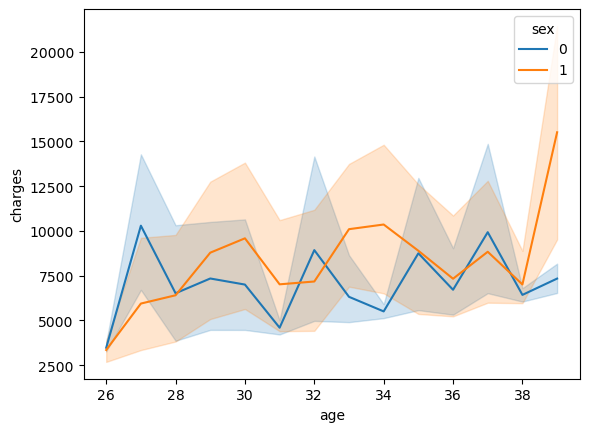

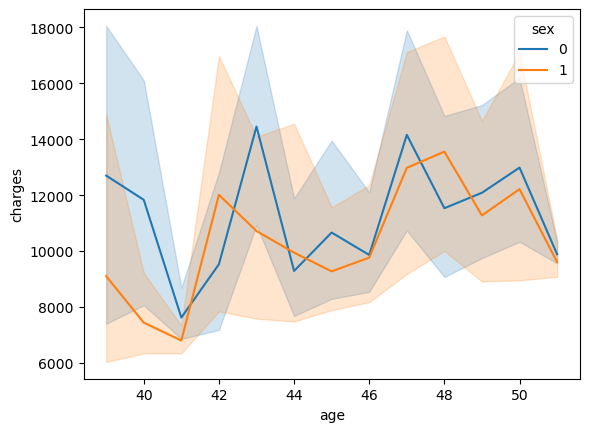

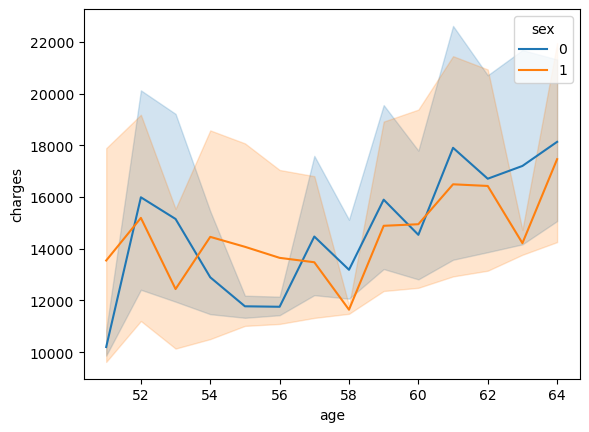

In [23]:
sns.lineplot(x = 'age', y = 'charges' , hue = 'sex', data = df1)
plt.show()

sns.lineplot(x = 'age', y = 'charges' , hue = 'sex', data = df2)
plt.show()

sns.lineplot(x = 'age', y = 'charges' , hue = 'sex', data = df3)
plt.show()

sns.lineplot(x = 'age', y = 'charges' , hue = 'sex', data = df4)
plt.show()

# In all age groups it is safe to assume that females have greater amount of charges as compared to males except for ages between 26 and 38

In [24]:
df1.describe()

,age,sex,bmi,children,smoker,region,charges
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,21.013378,0.508361,29.372609,0.658863,0.140468,1.518395,6532.620567
std,2.654581,0.500768,6.059082,1.113077,0.348055,1.109218,8377.684731
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,19.000000,0.000000,25.175000,0.000000,0.000000,1.000000,1858.931500
50%,20.000000,1.000000,29.150000,0.000000,0.000000,2.000000,2566.470700
75%,23.000000,1.000000,33.315000,1.000000,0.000000,2.500000,4639.683125
max,26.000000,1.000000,53.130000,5.000000,1.000000,3.000000,34472.841000


In [25]:
df2.describe()

,age,sex,bmi,children,smoker,region,charges
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,32.433333,0.483333,29.549150,1.410000,0.123333,1.506667,7704.768152
std,3.746868,0.500557,6.011941,1.211111,0.329369,1.095730,5831.416054
min,26.000000,0.000000,16.815000,0.000000,0.000000,0.000000,2483.736000
25%,29.000000,0.000000,25.785000,0.000000,0.000000,1.000000,4348.852338
50%,32.000000,0.000000,29.070000,1.000000,0.000000,1.500000,5269.996975
75%,36.000000,1.000000,33.178750,2.000000,0.000000,2.000000,6819.088525
max,39.000000,1.000000,46.530000,5.000000,1.000000,3.000000,32734.186300


In [26]:
df3.describe()

,age,sex,bmi,children,smoker,region,charges
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,45.180602,0.481605,30.251906,1.434783,0.110368,1.468227,10883.253059
std,3.538972,0.500499,5.883890,1.197702,0.313873,1.111937,5882.768578
min,39.000000,0.000000,18.050000,0.000000,0.000000,0.000000,5415.661200
25%,42.000000,0.000000,25.820000,1.000000,0.000000,0.000000,7483.214650
50%,45.000000,0.000000,29.800000,1.000000,0.000000,1.000000,8605.361500
75%,48.000000,1.000000,34.100000,2.000000,0.000000,2.000000,10116.716425
max,51.000000,1.000000,48.070000,5.000000,1.000000,3.000000,32787.458590


In [27]:
df4.describe()

,age,sex,bmi,children,smoker,region,charges
count,300.00000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,57.36000,0.483333,31.203600,0.836667,0.086667,1.526667,14609.867020
std,3.85746,0.500557,5.952454,1.140610,0.281816,1.125542,5658.389568
min,51.00000,0.000000,18.335000,0.000000,0.000000,0.000000,8782.469000
25%,54.00000,0.000000,26.600000,0.000000,0.000000,1.000000,11301.728225
50%,57.00000,0.000000,31.220000,0.000000,0.000000,2.000000,12509.447825
75%,61.00000,1.000000,35.836250,2.000000,0.000000,3.000000,14315.142475
max,64.00000,1.000000,49.060000,5.000000,1.000000,3.000000,33471.971890


# mean is increasing with age groups 
# standard deviation is decreasing with increase in age

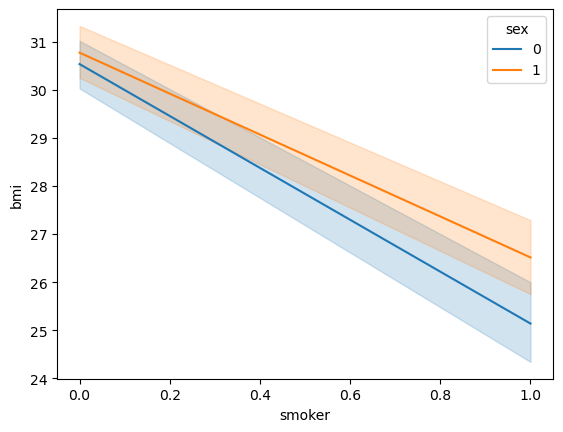

In [28]:
sns.lineplot(x = 'smoker', y = 'bmi',hue = 'sex',  data = df)
plt.show()

# People who smoke have lower bmi than people who do not smoke

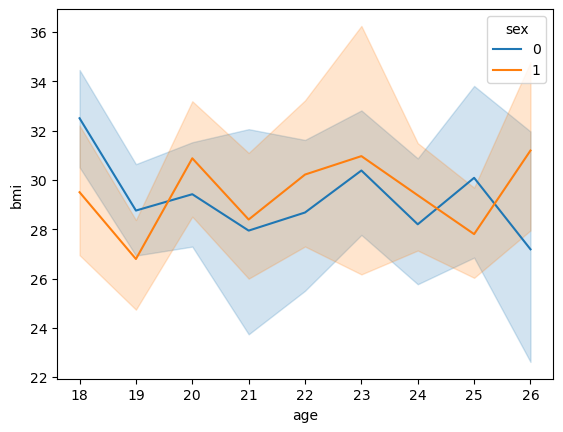

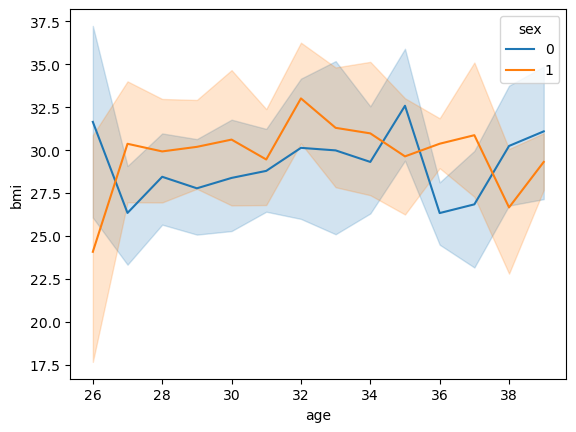

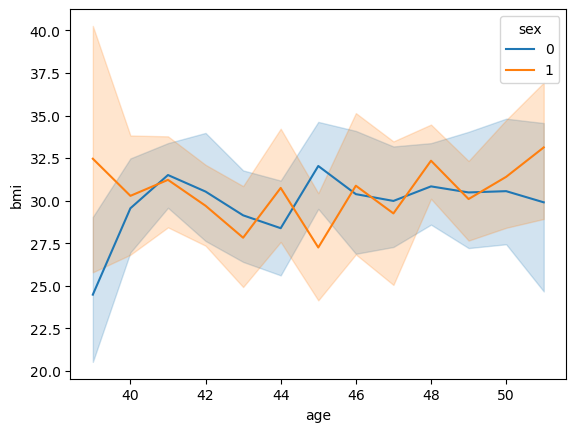

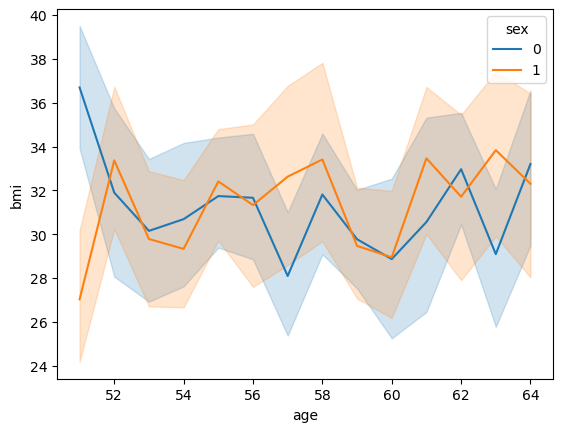

In [29]:
sns.lineplot(x = 'age', y = 'bmi', hue = 'sex', data = df1)
plt.show()

sns.lineplot(x = 'age', y = 'bmi', hue = 'sex', data = df2)
plt.show()

sns.lineplot(x = 'age', y = 'bmi', hue = 'sex', data = df3)
plt.show()

sns.lineplot(x = 'age', y = 'bmi', hue = 'sex', data = df4)
plt.show()

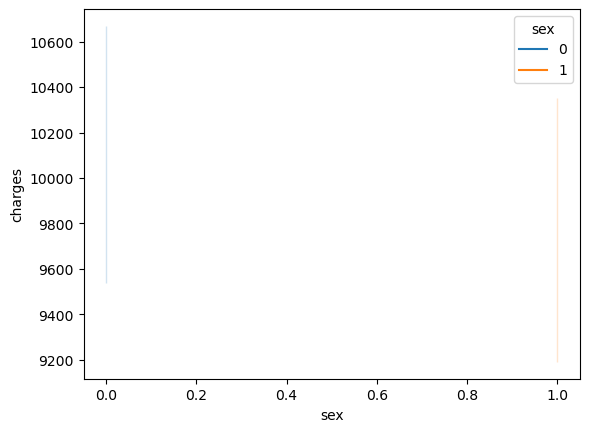

In [30]:
sns.lineplot(x='sex',y='charges', hue = 'sex',data=df)
plt.show()

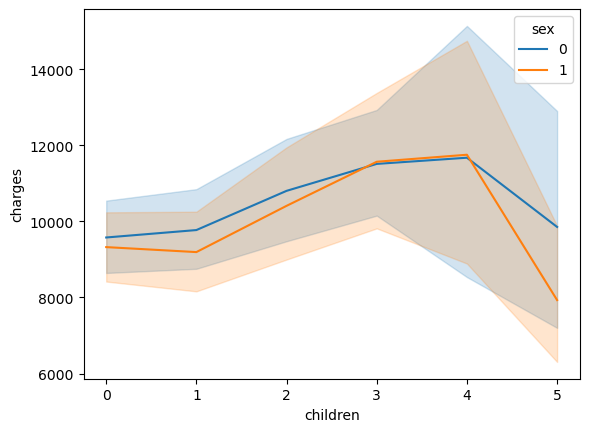

In [31]:
sns.lineplot(x = 'children', y = 'charges', hue = 'sex', data = df)
plt.show()

# It can be said that single mothers have slightly higher charges as comparede to single fathers even if the difference isnt very significant

In [32]:
print(np.count_nonzero(df['sex'] == 0))
print(np.count_nonzero(df['sex'] == 1))

612
586


In [33]:
df

,age,sex,bmi,children,smoker,region,charges
0,18,0,39.820,0,0,1,1633.96180
1,18,0,31.350,0,0,1,1622.18850
2,18,0,25.080,0,0,3,2196.47320
3,18,0,33.880,0,0,1,11482.63485
4,18,1,25.460,0,0,3,1708.00140
...,...,...,...,...,...,...,...
1193,64,1,25.600,2,0,0,14988.43200
1194,64,1,34.500,0,0,0,13822.80300
1195,64,0,30.115,3,0,2,16455.70785
1196,64,1,23.760,0,1,1,26926.51440


In [34]:
df.drop(['children', 'region', 'bmi','sex','smoker'],axis = 1,inplace = True)


In [35]:
df.to_csv('Medical_charges.csv')

In [36]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model, metrics

In [37]:
def estimate_coeff(x,y):
    n = np.size(x)
    
    mx = np.mean(x)
    my = np.mean(y)
    
    SSxy = np.sum(x*y) - n*mx*my
    SSxx = np.sum((x*x)) - n*(mx*mx)
    
    b1 = SSxy/SSxx
    b0 = my - b1*mx
    
    return (b0,b1)

In [38]:
def plot_best_fit(x,y,b):
    plt.scatter(x,y)
    plt.xlabel('X')
    plt.ylabel('Y_actual')
    plt.show()
    
    y_pred = b[0] + x*b[1]
    
    plt.scatter(x,y_pred)
    plt.xlabel('X')
    plt.ylabel('Predicted Y')
    plt.show()
    
    return (y_pred)

Coeffecients are :  (4283.182888343405, 9.587223148194388)


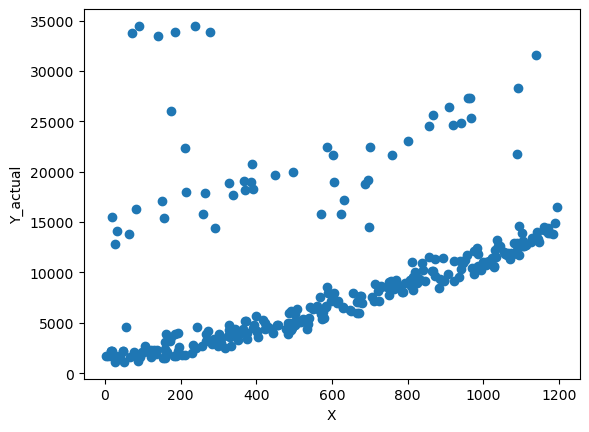

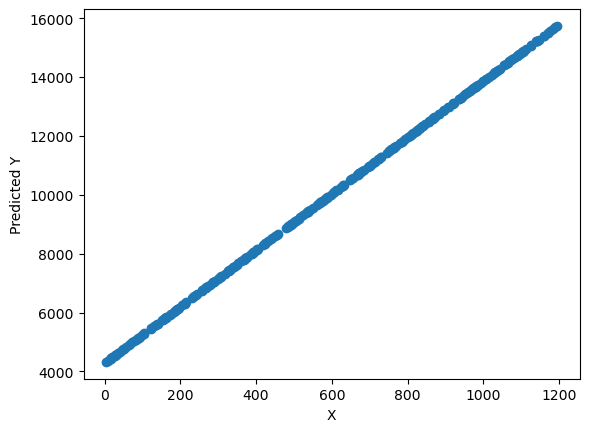

In [41]:
Df = pd.read_csv('Medical_charges.csv')
x = Df.iloc[0:,0]
y = Df['charges']
x_train,x_test,y_train,y_test = train_test_split(x,y)

b = estimate_coeff(x_train,y_train)
print("Coeffecients are : ",b)

y_pred = plot_best_fit(x_test,y_test,b)

In [43]:
accuracy = r2_score(y_test,y_pred)
print(accuracy)

0.12799840925647188
